In [11]:
# Import necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Ensure the use of the Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # If only plt is used, switching to Agg backend
import seaborn as sns
import warnings

# Suppress warnings for a cleaner notebook output
warnings.filterwarnings('ignore')

# Set inline plotting
%matplotlib inline

# Set the plotting style for a consistent look
sns.set(style='whitegrid')

In [12]:
# Load the dataset
file_path = '/kaggle/input/student-dataset/student_depression_dataset.csv'
df = pd.read_csv(file_path, encoding='ascii', delimiter=',')

# Display the first few rows of the dataset
print('Dataset loaded. Here is the head of the dataset:')
print(df.head())

# Display basic information about the dataset
print('\nDataset Info:')
print(df.info())

Dataset loaded. Here is the head of the dataset:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Les

In [13]:
# Check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

# For simplicity, drop rows with missing values (if any)
df = df.dropna()

# Convert 'Sleep Duration' to a numeric representation if possible
# Assuming the format might be like '7 hours' or a similar string, extract numeric value
df['Sleep Duration Numeric'] = df['Sleep Duration'].str.extract('(\d+)', expand=False).astype(float)

# Display updated info after cleaning
print('\nDataset Info after cleaning:')
print(df.info())

# Create a numeric dataframe for correlation analyses, only selecting numeric columns
numeric_df = df.select_dtypes(include=[np.number])

Missing values in each column:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Dataset Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                

In [18]:
data = pd.read_csv("/kaggle/input/student-dataset/student_depression_dataset.csv")
df = pd.DataFrame(data)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Exploratory Data Analysis¶
We now delve into the data with a variety of visualizations to unearth insightful trends. Our toolkit includes histograms, pair plots, heatmaps for correlations, and several categorical plots like bar plots and count plots. This should provide a well-rounded overview of the dataset and possibly even hint at the relationship between various pressures and depression. Note: Correlation heatmaps will only be generated if there are four or more numeric columns.

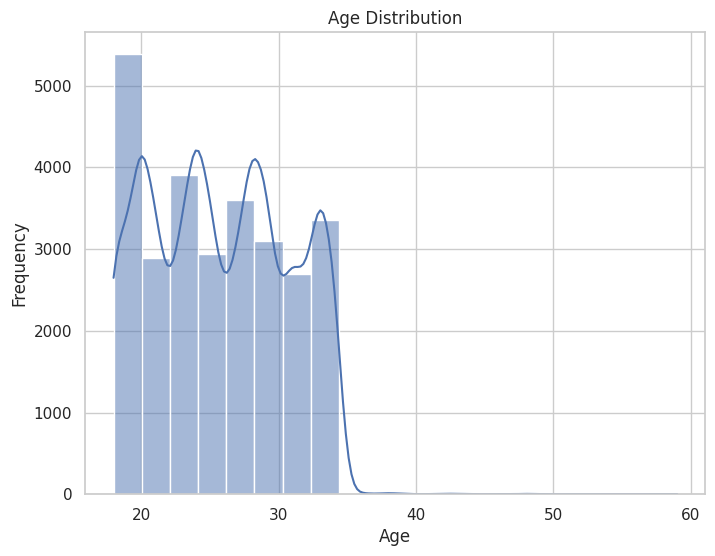

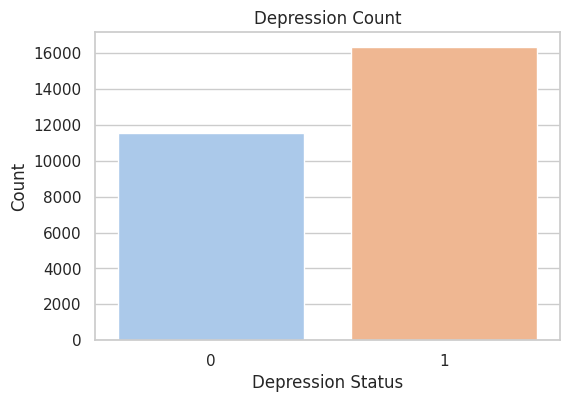

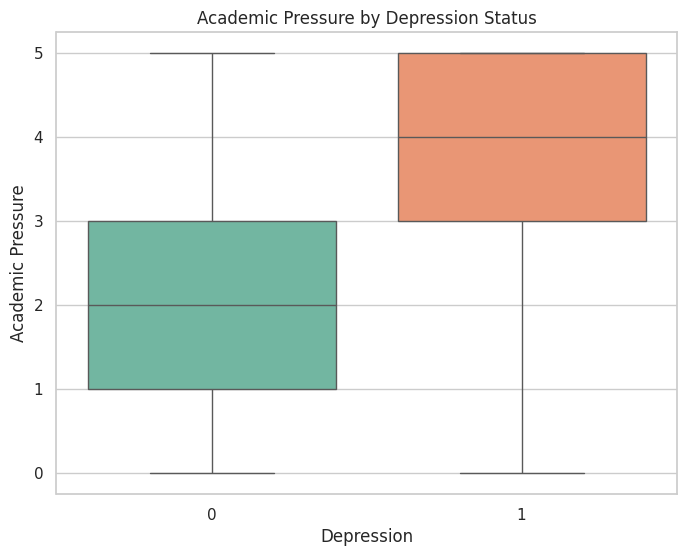

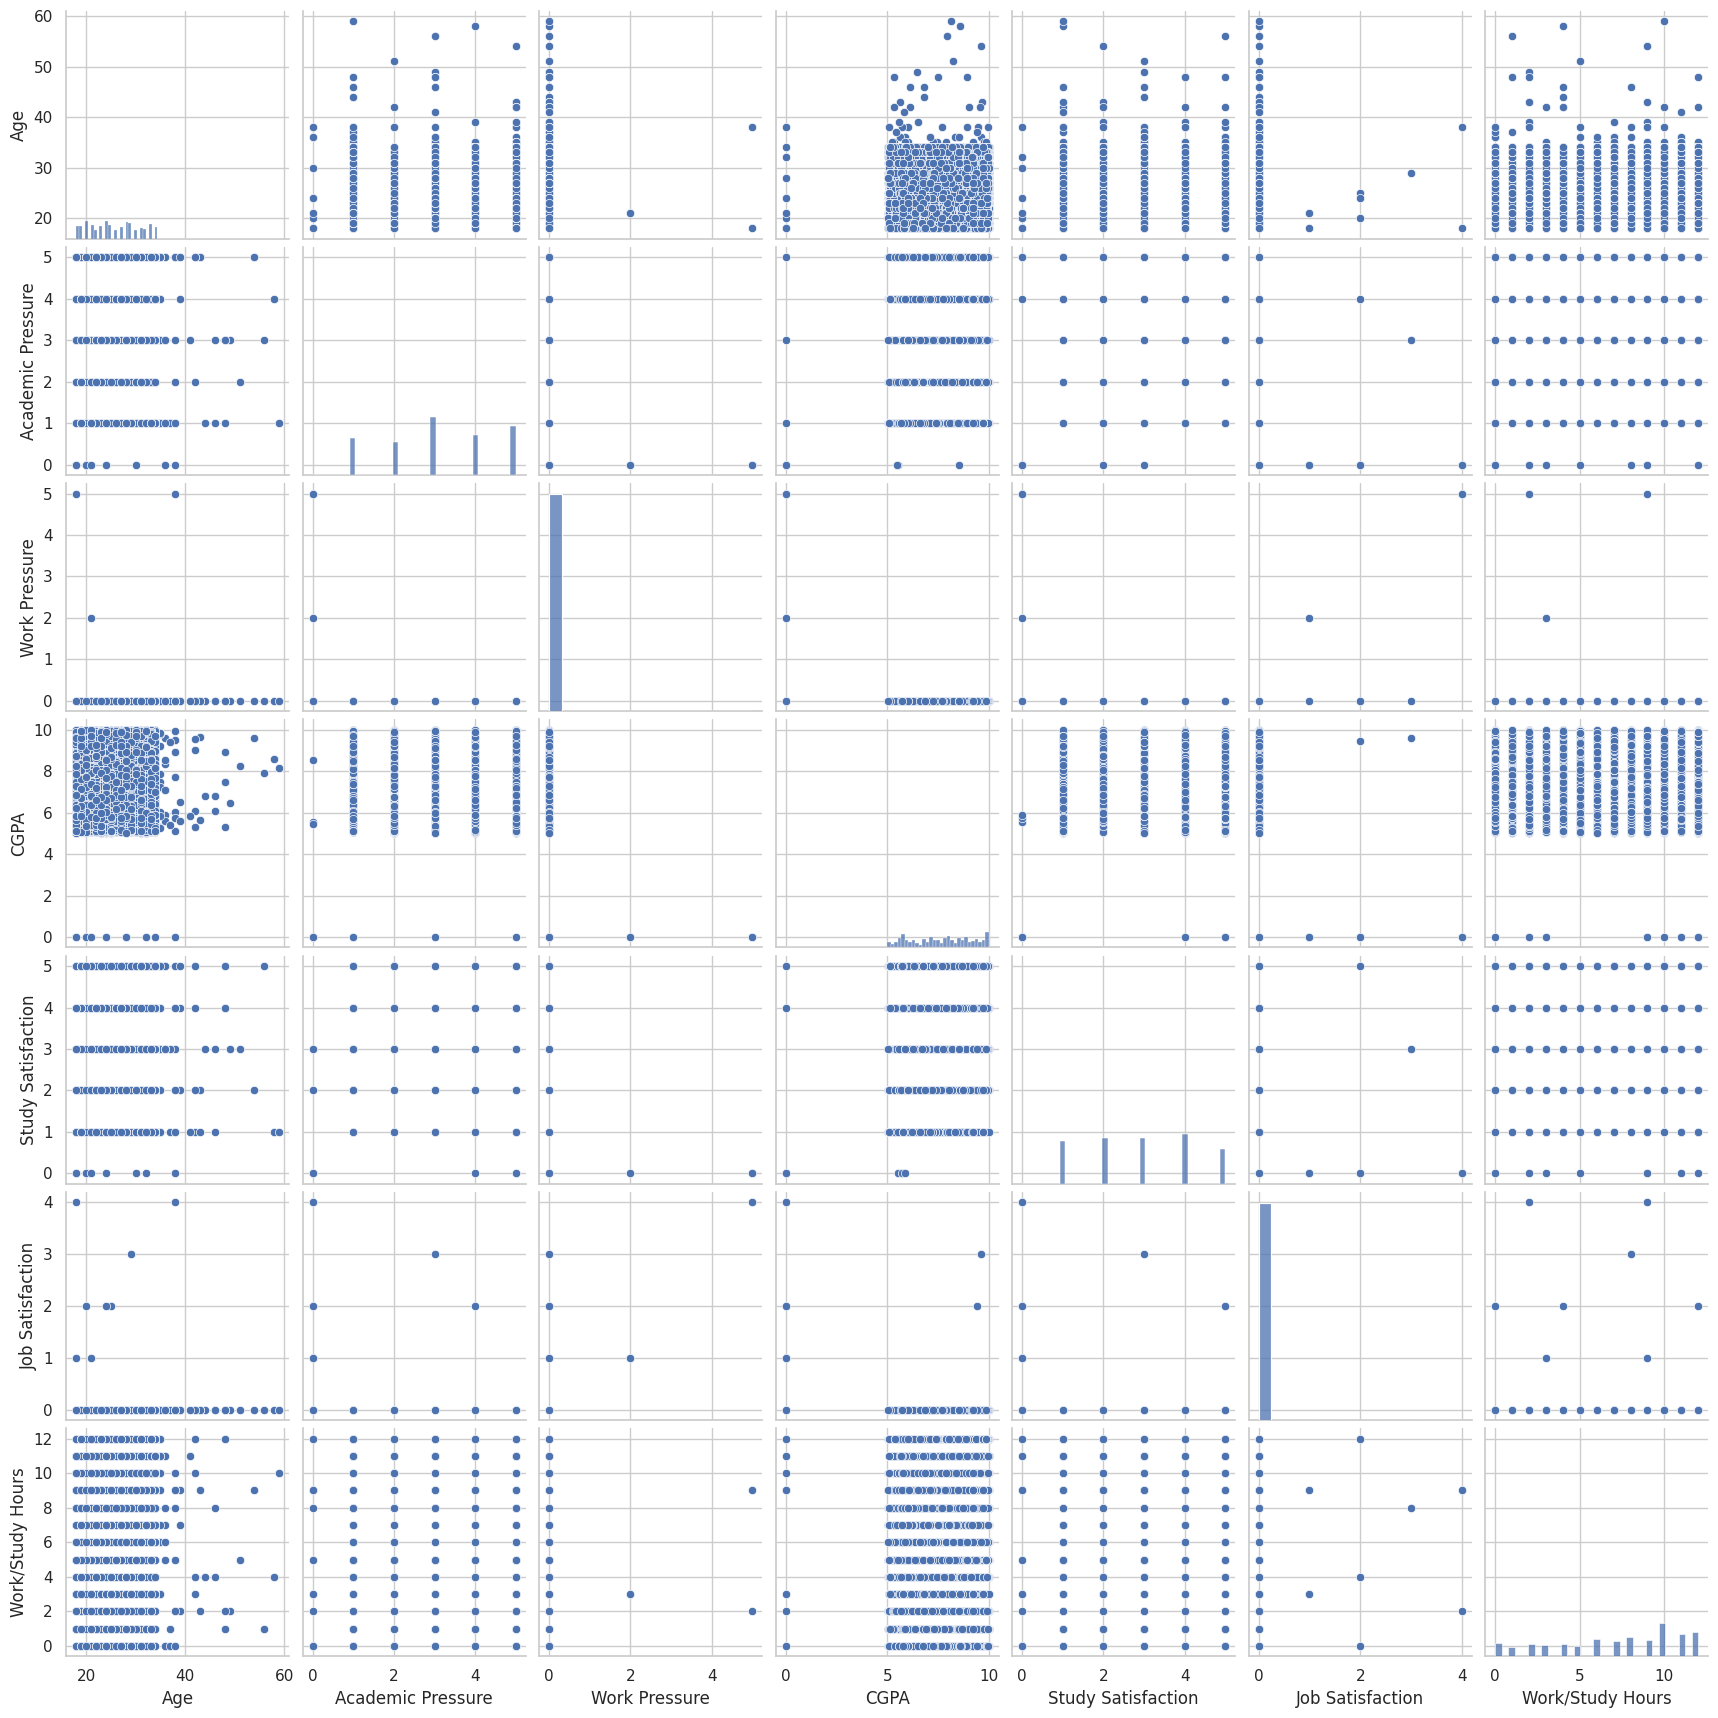

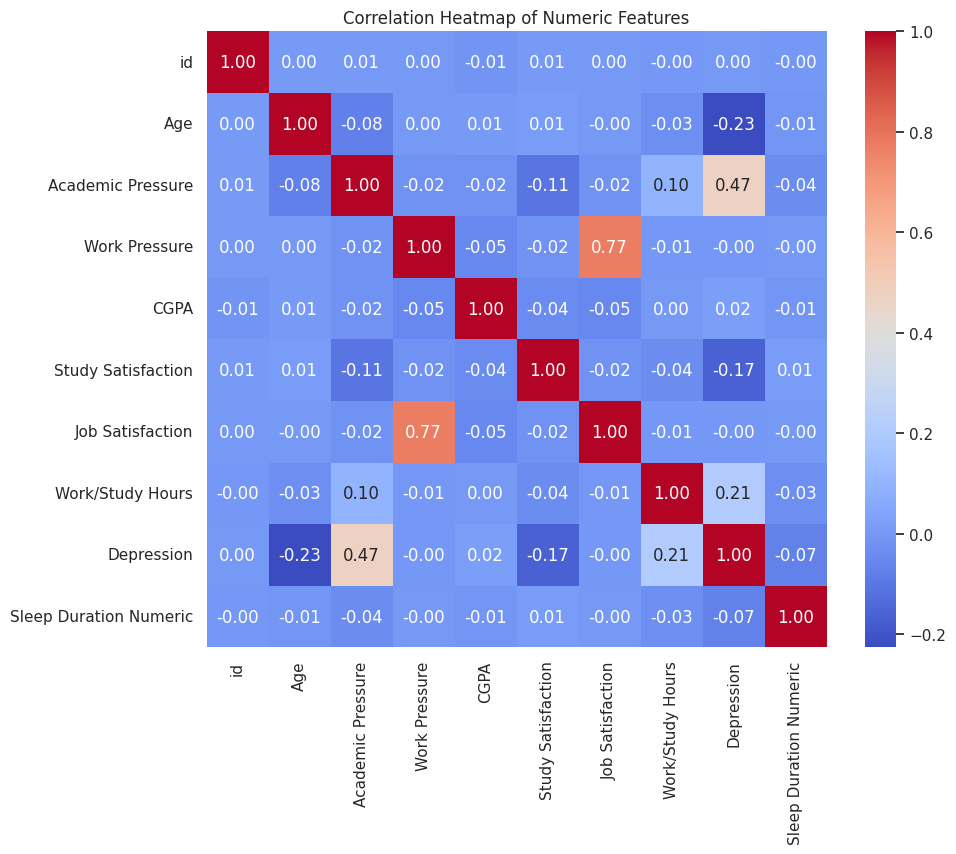

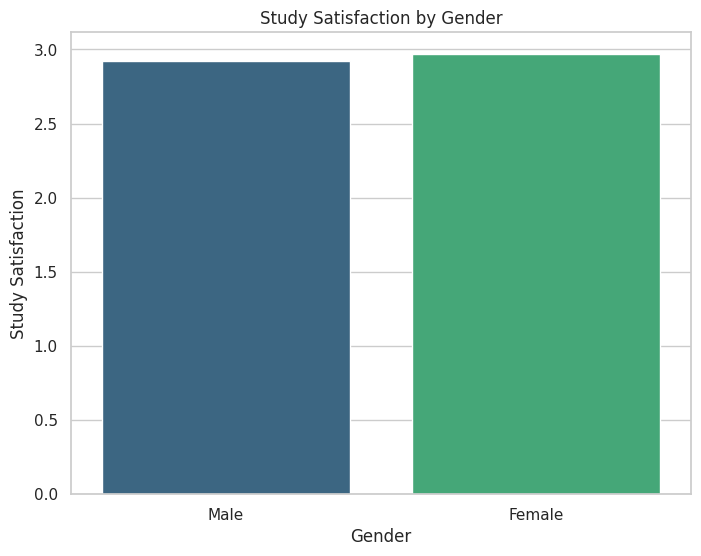

In [15]:
# Histogram of Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Count plot for Depression (categorical: depressed or not depressed)
plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=df, palette='pastel')
plt.title('Depression Count')
plt.xlabel('Depression Status')
plt.ylabel('Count')
plt.show()

# Boxplot to visualize the academic pressure distribution for depressed and non-depressed students
plt.figure(figsize=(8,6))
sns.boxplot(x='Depression', y='Academic Pressure', data=df, palette='Set2')
plt.title('Academic Pressure by Depression Status')
plt.show()

# Pair plot for selected numeric columns
selected_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']
sns.pairplot(df[selected_columns])
plt.show()

# If there are four or more numeric columns, display a correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

# Grouped barplot of Study Satisfaction by Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Study Satisfaction', data=df, palette='viridis', ci=None)
plt.title('Study Satisfaction by Gender')
plt.show()

Accuracy of the Logistic Regression model: 0.7588245834079914


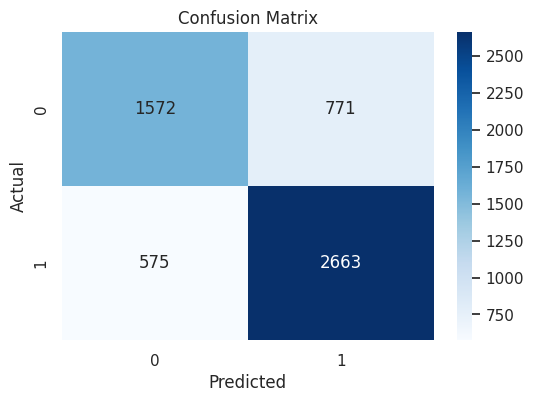

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# For prediction, select a subset of features and perform encoding for categorical features
features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Sleep Duration Numeric']

# Copy the relevant features. Ensure that they exist in the dataframe
X = df[features]
y = df['Depression']

# Optional: Handle any remaining missing values in X, even though we have cleaned earlier
X = X.fillna(X.mean())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the predictor using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Logistic Regression model:', accuracy)

# Plot the confusion matrix using seaborn's heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

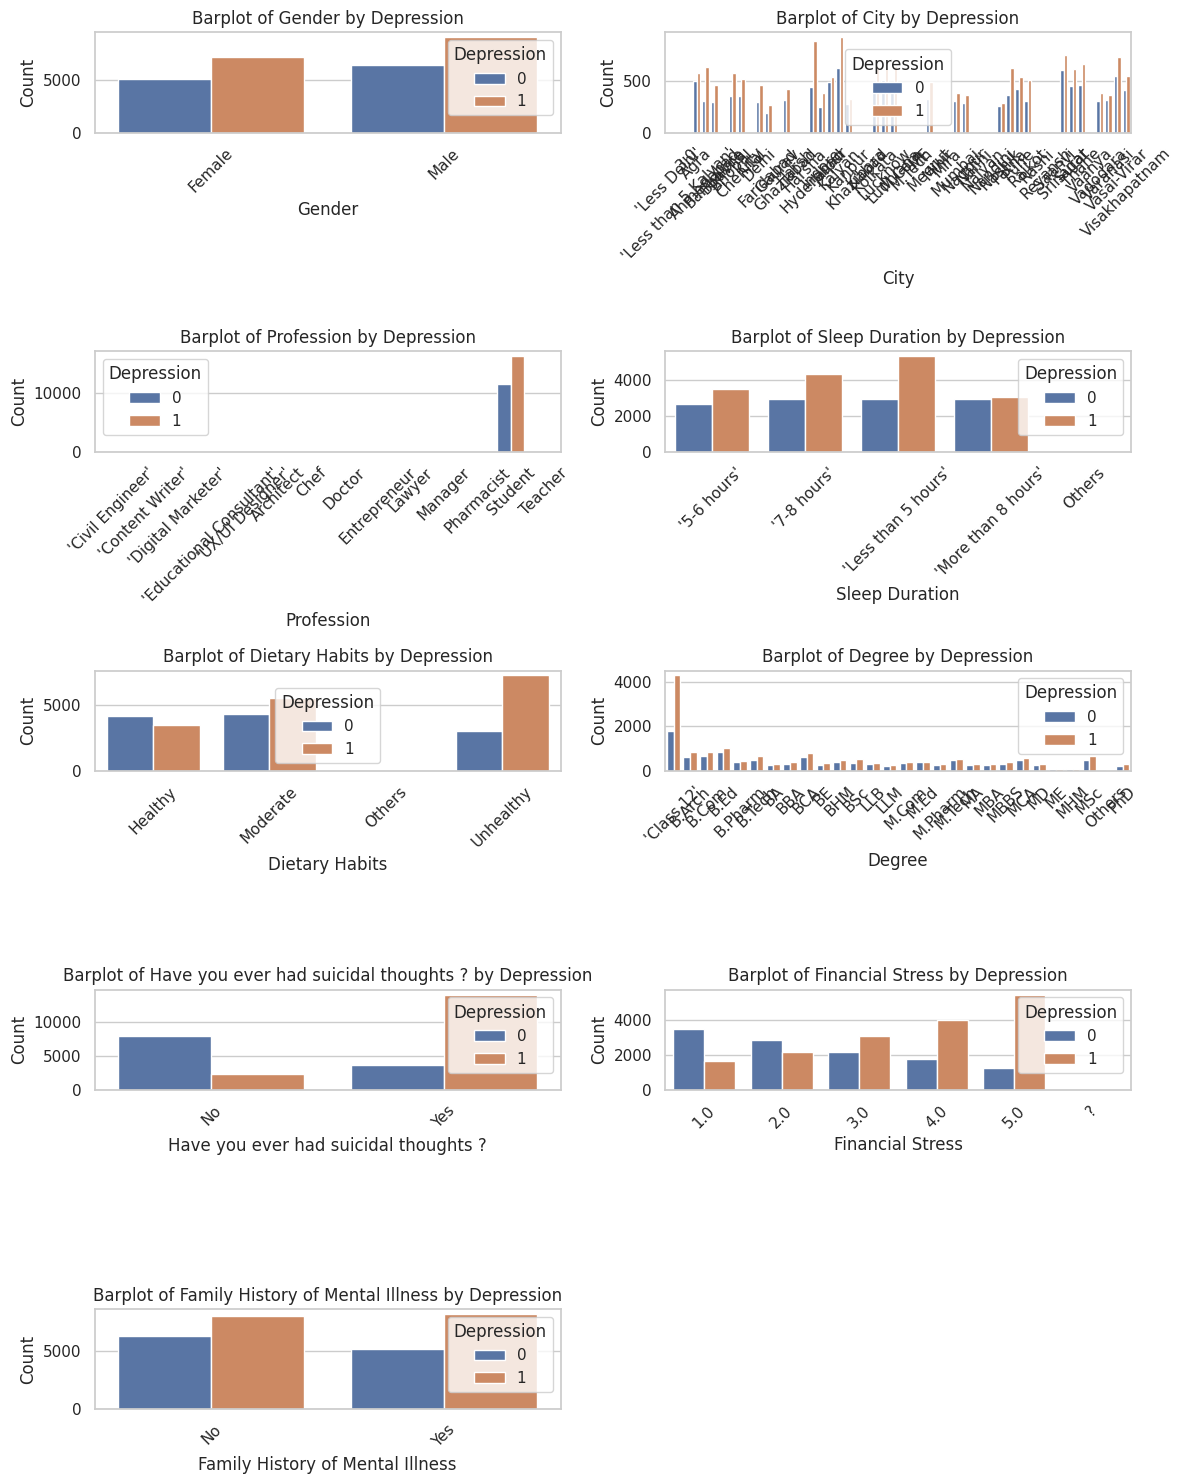

In [19]:
target = 'Depression'

bar_cols = df.select_dtypes(include = ['object', 'category']).columns.drop(target, errors = 'ignore')

b_features = len(bar_cols)
b_cols = 2
b_rows = (b_features + b_cols - 1) // b_cols

fig, axes = plt.subplots(b_rows, b_cols, figsize = (12, b_rows*3))
axes = axes.flatten()

for i, col in enumerate(bar_cols):
    counts = (
        df.groupby([col, target]).size().reset_index(name = 'count')
    )

    sns.barplot(
        x=col,
        y = 'count',
        hue = target,
        data = counts,
        ax = axes[i]
    )
    axes[i].set_title(f"Barplot of {col} by {target}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title=target)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Conclusion¶
This notebook provided a comprehensive analysis of the student depression dataset. Starting from data cleaning and exploratory visualizations to building a straightforward logistic regression predictor, we highlighted the steps and hurdles often encountered in real-world data analysis.

The analysis demonstrates how merging varied techniques, from pair plots to confusion matrices, can yield insights that are actionable and intriguing. Future analyses might explore more sophisticated predictive models, perform feature engineering on textual fields such as 'Dietary Habits', or even use time-series analysis if date-related data emerges.

If this notebook sparked an insight or helped you in any way, consider an upvote.*
